In [1]:
import tensorflow as tf
tf.__version__

In [3]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2644 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1069 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0726 - accuracy: 0.9776


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f'val_loss: {val_loss}, val_acc: {val_acc}')

313/313 [==============================] - 0s 812us/step - loss: 0.0919 - accuracy: 0.9715
val_loss: 0.09192905575037003, val_acc: 0.9714999794960022


In [12]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 807us/step


In [13]:
print(predictions)

[[3.45579543e-09 7.04920708e-08 1.15327737e-06 ... 9.99998331e-01
  5.10725462e-10 1.20106014e-08]
 [2.63152753e-08 1.60812074e-03 9.98028934e-01 ... 9.75545089e-10
  9.51906202e-07 4.47449152e-12]
 [9.73296963e-08 9.99917030e-01 9.38377434e-06 ... 8.44636725e-06
  2.52146092e-05 5.56556131e-07]
 ...
 [1.33022580e-08 6.63882975e-06 1.76630000e-09 ... 6.00101521e-05
  1.75775290e-06 5.27519791e-04]
 [6.63172341e-06 1.32138985e-05 1.78002637e-07 ... 9.50840604e-06
  2.34339692e-04 3.63252610e-08]
 [9.76573483e-06 1.14234915e-08 5.29184263e-07 ... 2.58274596e-10
  2.20799574e-08 8.95246188e-08]]


In [14]:
import numpy as np

print(np.argmax(predictions[0]))

7


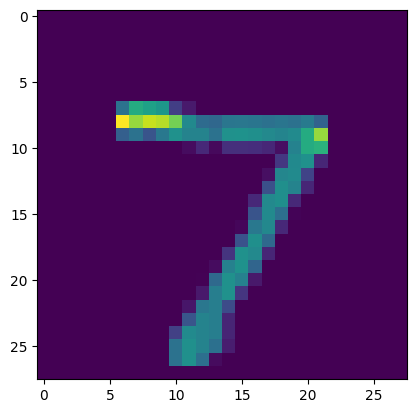

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()

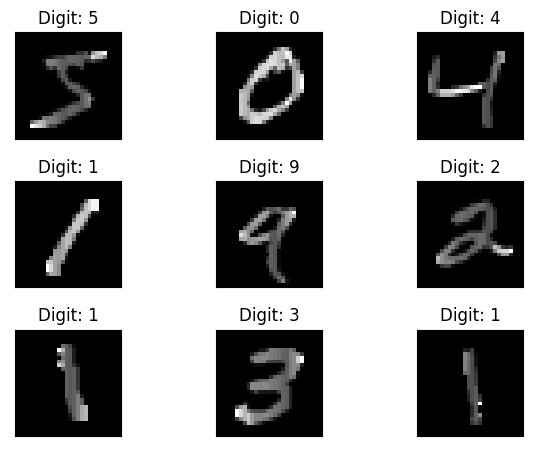

In [7]:

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
